## CASE STUDY 2: Diabetes Data
#### Building a Naive Byes model to classify the patients as diabetic or normal

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#importing libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
#importing the dataset
df = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/DATA SCIENCE COURSE (Datasets)/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Exploratory Data Analysis

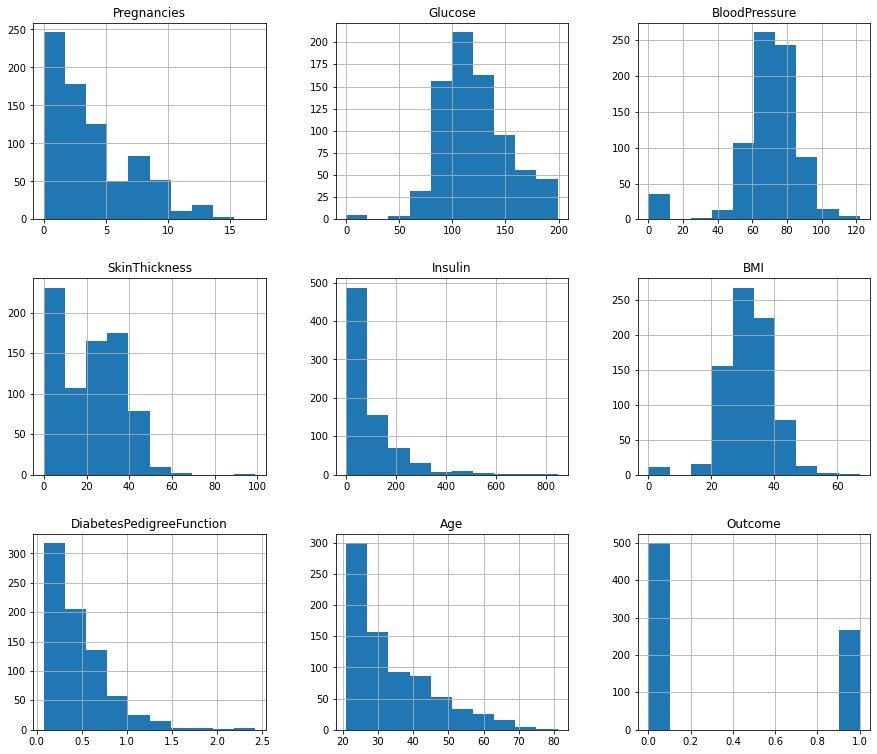

In [8]:
df.hist(bins = 10 , figsize = (15,13))
plt.show()

In [9]:
df1 = df.copy()
df1.drop('Outcome',axis = 1,inplace = True)

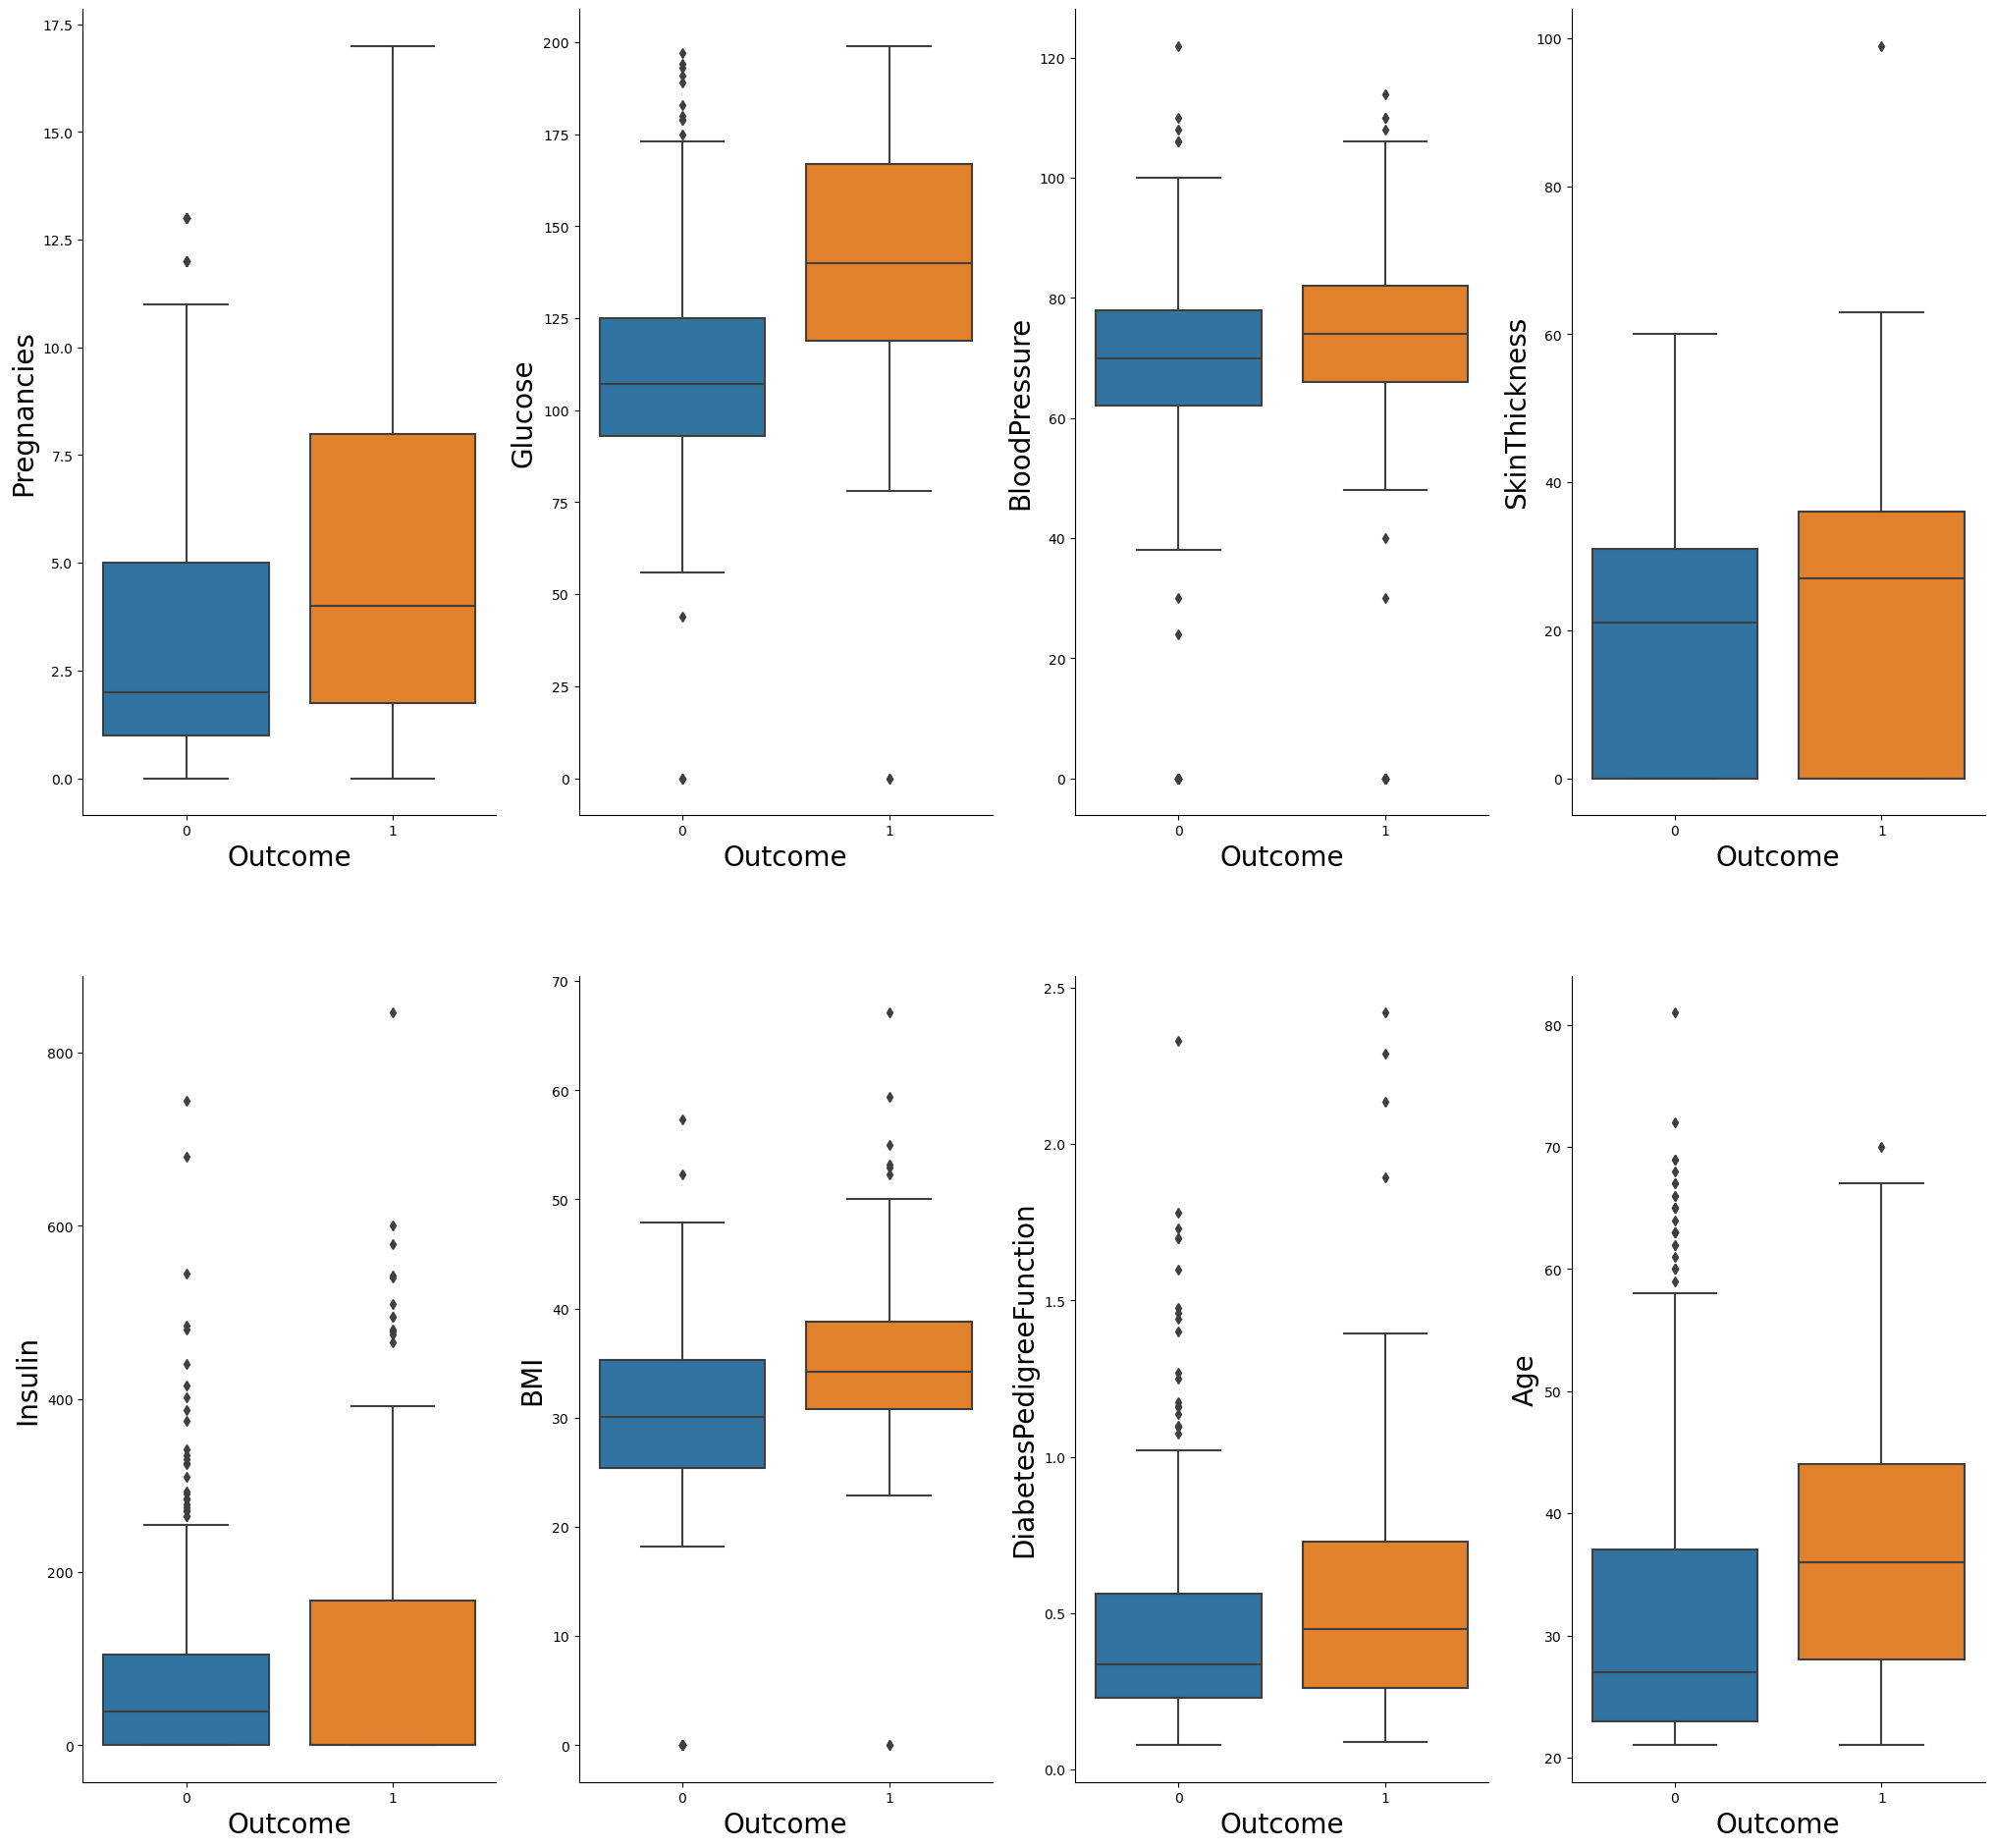

In [10]:
attributes = df1.columns

# plotting countplots 
plt.figure(figsize=(25, 50), dpi=100)
for i, feature in enumerate(attributes):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data = df, x = 'Outcome', y = feature)
    plt.xlabel("Outcome",size = 20)
    plt.ylabel(feature,size = 20)
    
sns.despine()

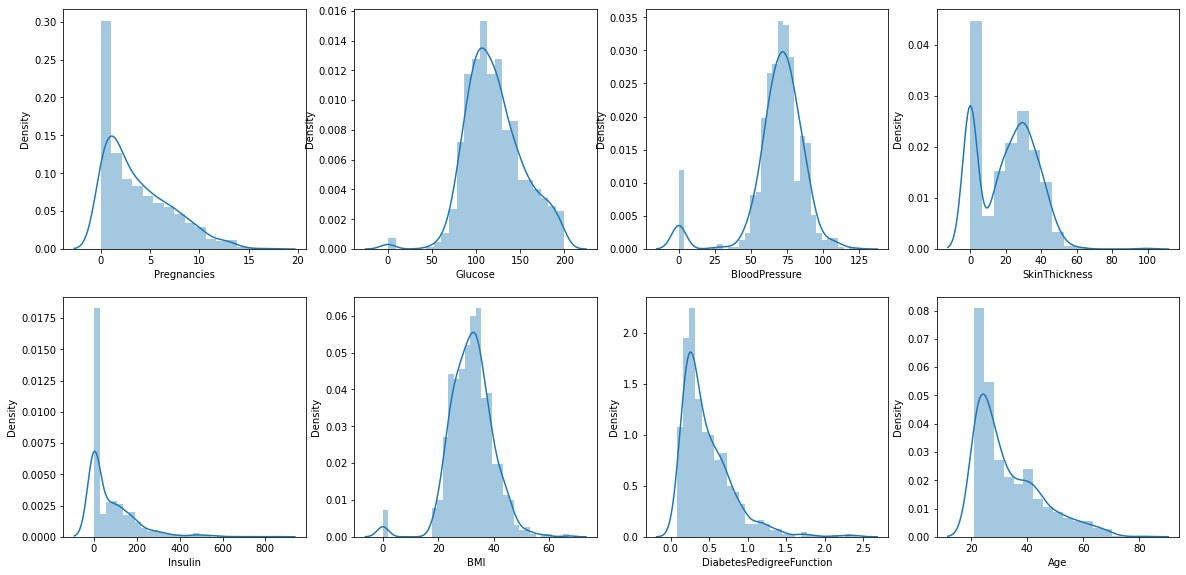

In [11]:
fig = plt.figure(figsize=(20,15))
for i,col in enumerate(df1.columns,1):
    plt.subplot(3,4,i)
    sns.distplot(df1[col])

plt.show()

#### Observations :-
- Pregnancies, Insulin, DiabetesPedigreeFunction, Age are positively skewed
- Glucose, BMI, Blood Pressure are normally distributed

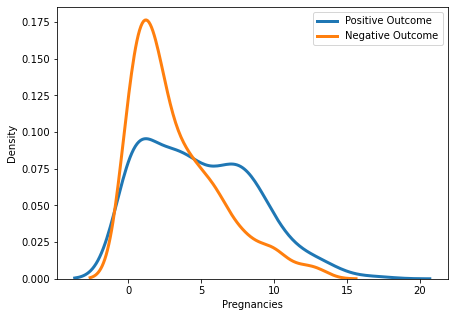

In [12]:
positive = df[df['Outcome'] == 1]
negative = df[df['Outcome'] == 0]

plt.subplots(figsize = (7,5))
sns.distplot(positive['Pregnancies'],hist = False,kde = True,kde_kws = {'linewidth': 3},label = 'Positive Outcome')
sns.distplot(negative['Pregnancies'],hist = False,kde = True,kde_kws = {'linewidth': 3},label = 'Negative Outcome')
plt.legend()
plt.show()

#### Observations :-
- After Pregnancy people have more chance of diabeties

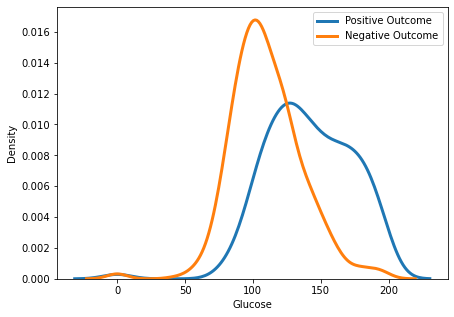

In [13]:
plt.subplots(figsize = (7,5))
sns.distplot(positive['Glucose'],hist = False,kde_kws = {'linewidth': 3},label = 'Positive Outcome')
sns.distplot(negative['Glucose'],hist = False,kde_kws = {'linewidth': 3},label = 'Negative Outcome')
plt.legend()
plt.show()

#### Observations :-
-  People with high Glucose level are more likely to have diabeties

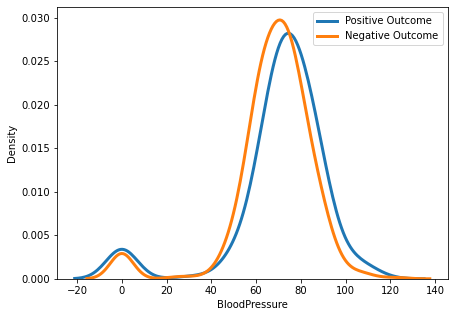

In [14]:
plt.subplots(figsize = (7,5))
sns.distplot(positive['BloodPressure'],hist = False,kde_kws = {'linewidth': 3},label = 'Positive Outcome')
sns.distplot(negative['BloodPressure'],hist = False,kde_kws = {'linewidth': 3},label = 'Negative Outcome')
plt.legend()
plt.show()

#### Observations :-
- Blood pressure values are nearly same
- This indicates that blood pressure does not have major impact on diabetes

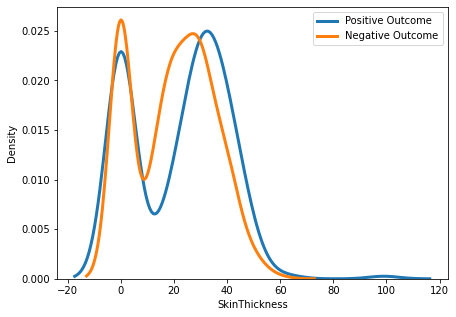

In [15]:
plt.subplots(figsize = (7,5))
sns.distplot(positive['SkinThickness'],hist = False,kde_kws = {'linewidth': 3},label = 'Positive Outcome')
sns.distplot(negative['SkinThickness'],hist = False,kde_kws = {'linewidth': 3},label = 'Negative Outcome')
plt.legend()
plt.show() 

#### Observations :-
- Skin thickness values are nearly same
- This indicates that skin thickness does not have major impact on diabetes

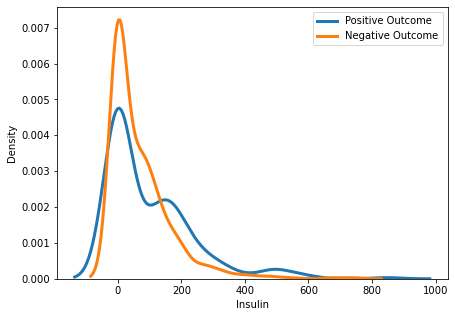

In [16]:
plt.subplots(figsize = (7,5))
sns.distplot(positive['Insulin'],hist = False,kde_kws = {'linewidth': 3},label = 'Positive Outcome')
sns.distplot(negative['Insulin'],hist = False,kde_kws = {'linewidth': 3},label = 'Negative Outcome')
plt.legend()
plt.show()

#### Observations :-
- People with high Insulin level are more likely to have Diabetes

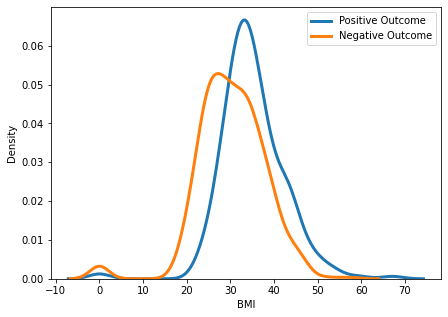

In [17]:
plt.subplots(figsize = (7,5))
sns.distplot(positive['BMI'],hist = False,kde_kws = {'linewidth': 3},label = 'Positive Outcome')
sns.distplot(negative['BMI'],hist = False,kde_kws = {'linewidth': 3},label = 'Negative Outcome')
plt.legend()
plt.show()

#### Observations :-
- People with high BMI are more likely to have Diabetes

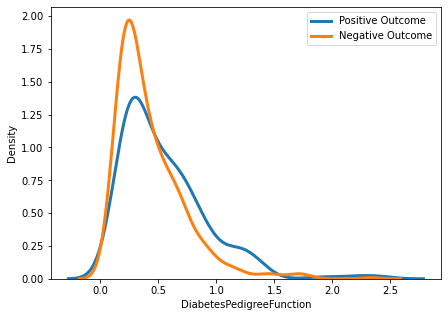

In [18]:
plt.subplots(figsize = (7,5))
sns.distplot(positive['DiabetesPedigreeFunction'],hist = False,kde_kws = {'linewidth': 3},label = 'Positive Outcome')
sns.distplot(negative['DiabetesPedigreeFunction'],hist = False,kde_kws = {'linewidth': 3},label = 'Negative Outcome')
plt.legend()
plt.show()

#### Observations :-
- People with high DaibetesPedigreeFunction are more likely to have Diabetes

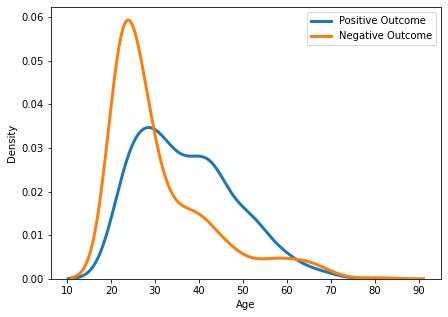

In [19]:
plt.subplots(figsize = (7,5))
sns.distplot(positive['Age'],hist = False,kde_kws = {'linewidth': 3},label = 'Positive Outcome')
sns.distplot(negative['Age'],hist = False,kde_kws = {'linewidth': 3},label = 'Negative Outcome')
plt.legend()
plt.show()

#### Observations :-
- Density plot of negative outcomes is positively skewed which indicates that no of non - daibetic patients are higher in early 20s and 30s
- It can be observed that chances of diabetes increases after 30

### Response Variable

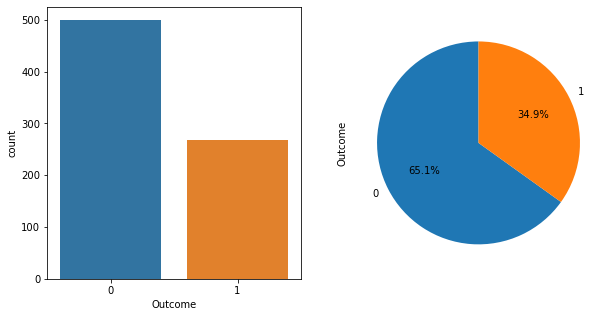

In [20]:
fig = plt.figure(figsize=(10,5))

#1
plt.subplot(1,2,1)
sns.countplot(x = 'Outcome', data = df)

#2
plt.subplot(1,2,2)
df['Outcome'].value_counts().plot.pie(startangle = 90,autopct = '%1.1f%%')

plt.show()

#### The bar plot shows the count values of the outcome and the pie chart shows that 65.1% people are healthy and 34.9% people are  diabetic 

### Splitting the dataframe into training and testing data

In [21]:
#assigning independent variables to x and dependent variable or response variable to y
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.20, random_state = 101)

In [23]:
#scaling each variable to unit variance
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Building Naive Bayes Model

In [1]:
# Training the Naive Bayes model on the Training set
classifier = GaussianNB()
classifier.fit(x_train, y_train)

NameError: name 'GaussianNB' is not defined

In [25]:
y_pred = classifier.predict(x_test)

In [26]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [28]:
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [31]:
print("Accurcy Score :",ac)

Accurcy Score : 0.7532467532467533


#### Accuracy score is 0.75 which can be considered good

In [33]:
cm

array([[83, 20],
       [18, 33]], dtype=int64)

#### Confusion Matrix shows that 83 and 33 are true negative and true positive values respectively i.e 83 and 33 are correct predictions